In [56]:
# Import basic
import pandas as pd
import numpy as np
import cv2
# Import plots
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# from keras.models import Sequential
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.models import model_from_json, Model, Sequential
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM, Dense

from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger
from importlib import reload
import visualization
import transformations
import model
import loader
import matplotlib.pyplot as plt
from visualization import plots

In [2]:
# model_file = '.hdf5_checkpoints-13/model.json'
# model_weights = '.hdf5_checkpoints-13/model.h5'
# master = 'data/driving_log.csv'
# data = pd.read_csv(master)
# data = data.rename_axis(None)
# data = shuffle(data)
# sns.distplot(data['steering'], kde=False)
# sns.plt.show()

In [3]:
train, validation = train_test_split(data, test_size=0.2, random_state=0)
print('TRAIN:', len(train))
print('VALIDATION:', len(validation))

BATCH_SIZE = 128

def generate_arrays_from_dataframe(data):
    while True:
        for offset in range(0, len(data), BATCH_SIZE):
            offset = 0
            batch = data[offset:offset+BATCH_SIZE]
            y = batch['steering'].values
            x = np.array([ cv2.imread('data/{}'.format(basename)) for basename in batch['center'].values])
            yield (x, y)

NameError: name 'data' is not defined

In [72]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
import numpy as np

model_file = '/Users/nando/Downloads/.hdf5_checkpoints-14/model.json'
model_weights = '/Users/nando/Downloads/.hdf5_checkpoints-14/model.h5'

from keras.models import model_from_json
with open(model_file, 'r') as f:
    model = model_from_json(f.read())

model.compile("adam", "mse")
model.load_weights(model_weights)

# print(model.summary())

img = Preproc(imgs[2])
feature_extractor = Model(input=model.layers[0].input, output=model.layers[17].output)
feature_extractor.compile(optimizer='adam', loss='mse')
out = feature_extractor.predict(np.reshape(img, (1, 80, 160, 3)))
# plt.scatter(np.arange(out.shape[1]), out, alpha=0.4, label='Raw')
# plt.show()

In [26]:
import visualization
reload(visualization)
from visualization import plots
from loader import ReadImg
from transformations import Preproc

feature_extractor = Model(input=model.layers[0].input, output=mode.layer[17].output)
img_path = 'data/IMG/center_2016_12_01_13_42_07_691.jpg'
org_img = ReadImg(img_path)
img = Preproc(org_img)

first_ELU = Model(input=model.layers[0].input, output=model.layers[2].output)
first_ELU.compile(optimizer='adam', loss='mse')

out = first_ELU.predict(np.reshape(img, (1, 66, 200, 3)))
feats = [cv2.resize(out[0, :, :, i], (200, 66)) for i in range(out.shape[-1])]
plots(feats, 6, 6, figsize=(16, 12), grid=False)

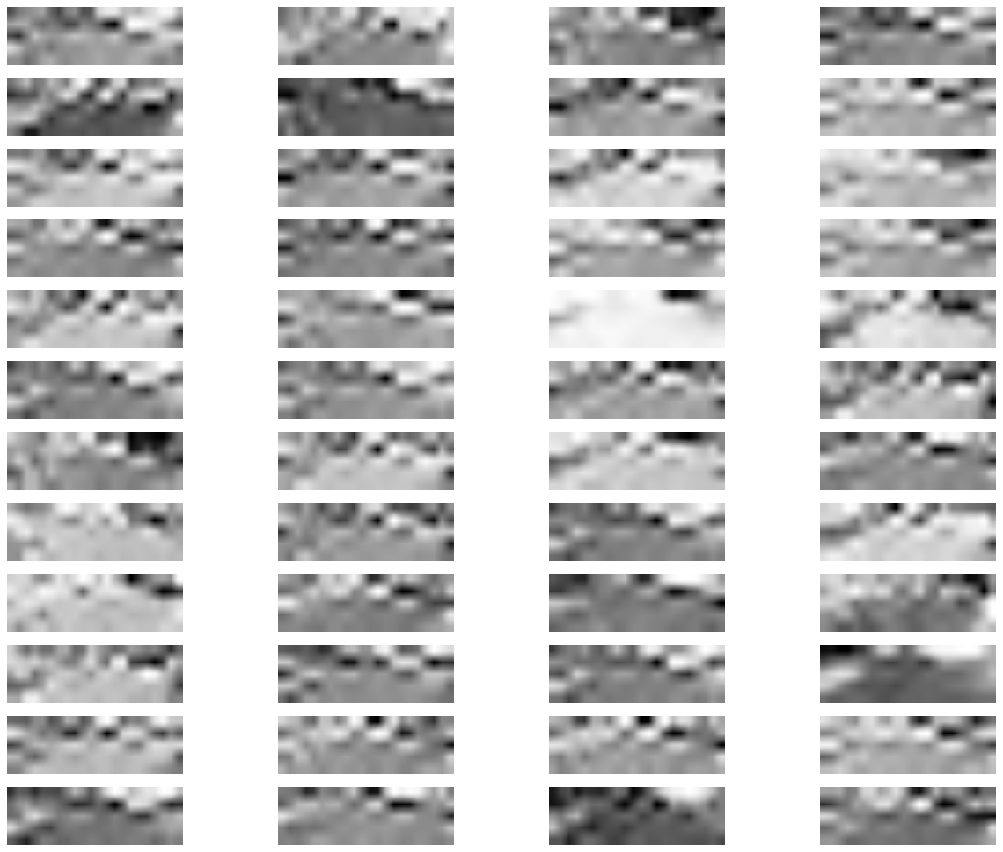

In [6]:
second_ELU = Model(input=model.layers[0].input, output=model.layers[6].output)
second_ELU.compile(optimizer='adam', loss='mse')

out = second_ELU.predict(np.reshape(img, (1, 66, 200, 3)))
feats = [cv2.resize(out[0, :, :, i], (200, 66)) for i in range(out.shape[-1])]
col = 4
row = out.shape[-1]/col
plots(feats, row, col, figsize=(16, 12), grid=False)

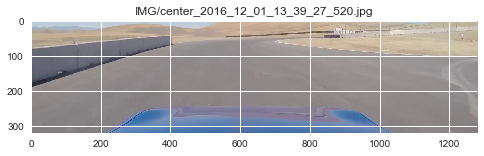

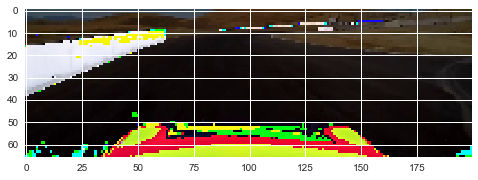

IMG/center_2016_12_01_13_39_27_520.jpg


In [8]:
reload(transformations)
reload(loader)
import matplotlib.pyplot as plt
from keras.models import model_from_json
from transformations import Preproc
from loader import ReadImg


IMAGES = '/Users/nando/Downloads/thunderhill_data'

std = np.std(train['steering'])
sample = train[train['steering'] > +3*std].sample()
basename = sample['center'].item()
# org_img = ReadImg('data/{}'.format(basename))
org_img = ReadImg('/Users/nando/Downloads/test.jpg')
img = Preproc(org_img)
plt.subplots(1, 1)
plt.title(basename)
plt.imshow(org_img)
plt.subplots(1, 1)
plt.imshow(img)
plt.show()
print(basename)
# img_input = np.expand_dims(img, axis=0)
# img = cv2.equalizeHist(img)
# clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(3,3))
# img = clahe.apply(img)
# plt.subplots(1, 1)
# plt.imshow(img)
# plt.show()
# pred = model.predict(img_input)
# print(sample['steering'].item(), pred, sample['center'].item())

## import loader
import transformations
reload(transformations)

from transformations import RandomBrightness, Preproc
reload(loader)
from loader import ReadImg
sample = train[train['steering'] > +3*std].sample()
left = Preproc(ReadImg('data/{}'.format(sample['left'].item().strip())))
center = Preproc(ReadImg('data/{}'.format(sample['center'].item().strip())))
right = Preproc(ReadImg('data/{}'.format(sample['right'].item().strip())))
images = [left, right, center]    
plots(images, 1, 3, figsize=(16, 12),labels=['left', 'center', 'right'])

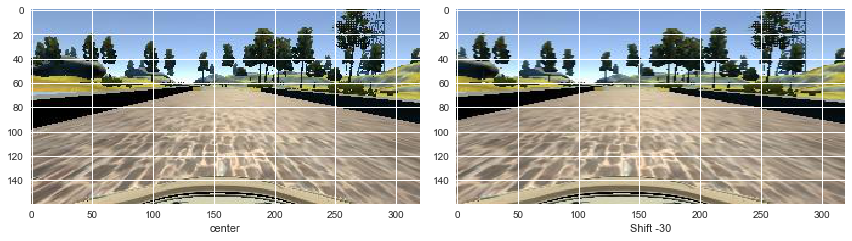

In [46]:
reload(transformations)
reload(visualization)
from visualization import plots
from transformations import Rotate, Translate, Crop, Resize, Shift
img_path = 'data/IMG/center_2016_12_01_13_30_48_287.jpg'
img = ReadImg(img_path)
plots([img, Shift(img, -30)], 1, 2, figsize=(12, 9), labels=['center', 'Shift -30'], grid=True)

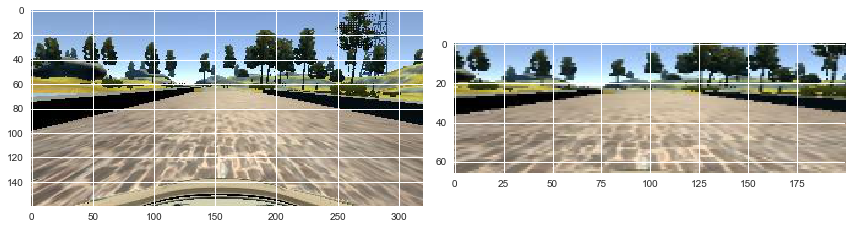

In [21]:
img_path = 'data/IMG/center_2016_12_01_13_30_48_287.jpg'
org_img = ReadImg(img_path)
img = Preproc(org_img)
plots([org_img, img], 1, 2, figsize=(12, 9))

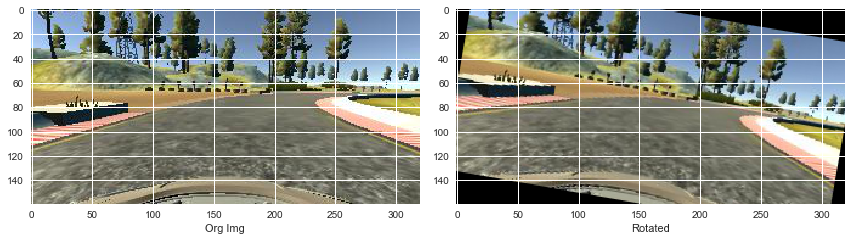

In [47]:
rot = Rotate(angle=-10)
img = rot.apply(org_img)
plots([org_img, img], 1, 2, figsize=(12, 9), labels=['Org Img', 'Rotated'])

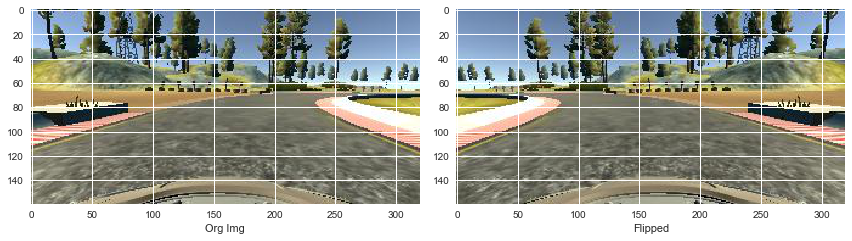

In [48]:
from transformations import Flip
img_path = 'data/IMG/center_2016_12_01_13_40_09_658.jpg'
org_img = ReadImg(img_path)
flip = Flip()
img = flip.apply(org_img)
plots([org_img, img], 1, 2, figsize=(12, 9),labels=['Org Img', 'Flipped'])

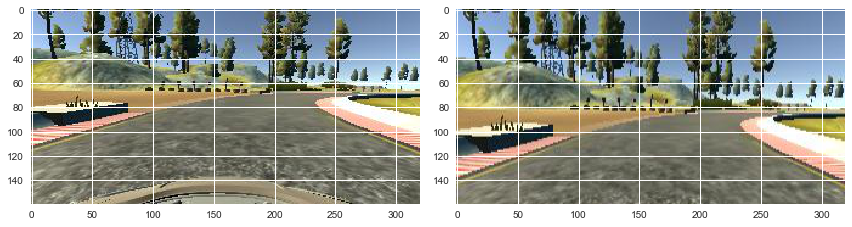

In [26]:
# from transformations import Shift

def Shift(_img, by_x=0, by_y=0):
    height = _img.shape[0]
    width = _img.shape[1]
    img = Translate(by_x=by_x, by_y=by_y).apply(_img)
    if by_x >= 0 and by_y > 0:
        img = Crop(by_x, width, by_y, height).apply(img)
    elif by_x >= 0 and by_y < 0:
        img = Crop(by_x, width, 0, height+by_y).apply(img)
    elif by_x < 0 and by_y < 0:
        img = Crop(0, width + by_x, 0, height + by_y).apply(img)
    elif by_x < 0 and by_y > 0:
        img = Crop(0, width + by_x, by_y, height).apply(img)
    img = Resize(width, height).apply(img)
    return img

org_img = ReadImg(img_path)
img = Shift(org_img, 0, +30)
# img = Translate(by_x=0, by_y=10).apply(org_img)
plots([org_img, img], 1, 2, figsize=(12, 9))

In [11]:
df = train[train['steering']<-2*std].sample(5, replace=True)
print(df.shape)
df.append(train[train['steering']<2*std].sample(5, replace=True))
print(df.shape)
df = df.append(train[train['steering']<2*std].sample(5, replace=True))
print(df.shape)

(5, 7)
(5, 7)
(10, 7)


0.5784606


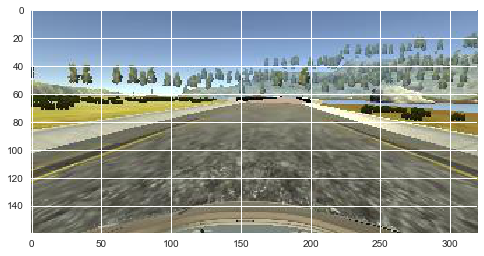

In [12]:
sample = train[train['steering'] > +3*std].sample(1)
basefile = sample['center'].item().strip()
img_path = 'data/{}'.format(basefile)
org_img = ReadImg(img_path)
print(sample['steering'].item())
plt.imshow(org_img)
plt.show()

0.598429556054164


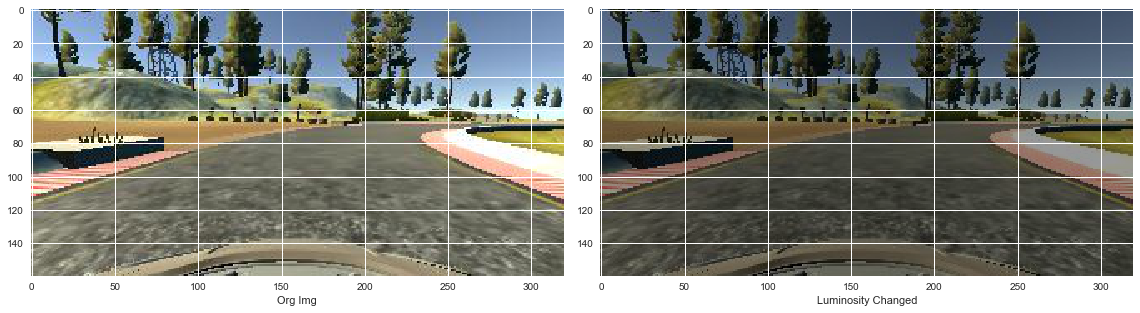

In [50]:
from transformations import RGB2HSV

trans = RGB2HSV()
img = trans.apply(org_img)
# print(img[:, :, 2])
dim = np.random.uniform()
print(dim)
img[:, :, 2] = img[:, :, 2] * dim
# print
# print(img[:, :, 2])
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
# plt.imshow(img)
# plt.show()
plots([org_img, img], 1, 2, figsize=(16, 12), labels=['Org Img', 'Luminosity Changed'])

In [40]:
sample = train[train['steering'] < +2*std].sample()
sample2 = train[train['steering'] < +2*std].sample()
sample = sample.append(sample2)

sample

,center,left,right,steering,throttle,brake,speed
4795,IMG/center_2016_12_01_13_41_13_159.jpg,IMG/left_2016_12_01_13_41_13_159.jpg,IMG/right_2016_12_01_13_41_13_159.jpg,-0.145206,0.985533,0.0,30.18496
6209,IMG/center_2016_12_01_13_43_36_546.jpg,IMG/left_2016_12_01_13_43_36_546.jpg,IMG/right_2016_12_01_13_43_36_546.jpg,-0.116723,0.985533,0.0,30.18623


In [107]:
sample['steering'].values

array([ 0.,  0.])

In [108]:
np.random.normal(0, 0.0001, 10000)
# zero = train[train['steering'] == 0]
# zero['steering'] = np.random.choice([np.random.normal(0, 0.0001)])
train.head()

,center,left,right,steering,throttle,brake,speed,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
8421,IMG/center_2017_01_28_21_04_45_005.jpg,NaN,NaN,-0.450000,0.400000,0.0,30.0292,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9901,IMG/center_2017_01_28_21_09_33_299.jpg,NaN,NaN,-0.266667,0.400000,0.0,30.02871,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8822,IMG/center_2017_01_28_21_07_04_922.jpg,NaN,NaN,0.000000,0.000000,0.0,4.515845,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6558,IMG/center_2016_12_01_13_44_11_946.jpg,IMG/left_2016_12_01_13_44_11_946.jpg,IMG/right_2016_12_01_13_44_11_946.jpg,0.000000,0.985533,0.0,30.18663,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12542,IMG/center_2017_01_29_02_44_32_952.jpg,NaN,NaN,0.000000,0.400000,0.0,13.53091,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


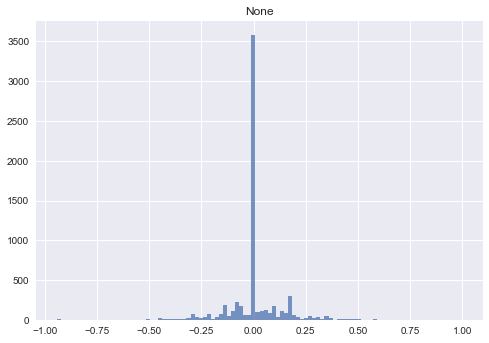

In [54]:
reload(visualization)
from visualization import hist
hist(train, 'steering')

300
2924
3224


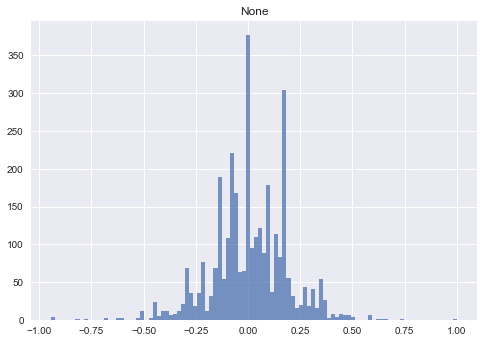

In [57]:
df = train.dropna(axis=0)
zeros = df.where(df['steering'] == 0).dropna(axis=0).sample(300)
non_zeros = df.where(df['steering'] != 0).dropna(axis=0)
df = zeros.append(non_zeros)

print(len(zeros))
print(len(non_zeros))
print(len(df))

hist(df, 'steering')

In [47]:
print(train['steering'].std())

0.129437448412


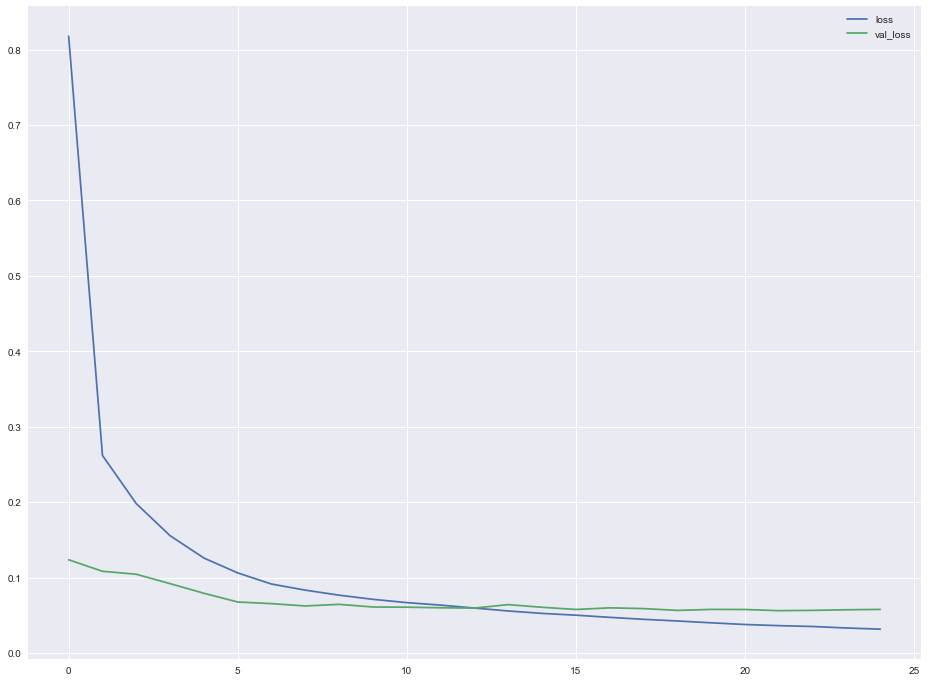

In [72]:
df = pd.read_csv('/Users/nando/Downloads/.hdf5_checkpoints-14/history.csv')
plt.figure(figsize=(16,12))
plt.plot(df['epoch'], df['loss'])
plt.plot(df['epoch'], df['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [15]:
import config
reload(loader)
reload(config)
reload(transformations)
from loader import *
from config import *
from transformations import *

ROOT = '/Users/nando/workspace/thunderhill_data'
OUTPUT = '.'
df_train, df_val = getDataFromFolder(ROOT, OUTPUT)
sample = df_train.sample(6)
# df_train = df_train.drop(['right', 'left'], 1)
df_train.head()

,brake,center,position,positionX,positionY,positionZ,rotation,rotationX,rotationY,rotationZ,speed,steering,throttle
2206,0.792879,/Users/nando/workspace/thunderhill_data/datase...,1244.621:1322.037:3.969724,1244.621,1322.0370,3.969724,355.7943:269.7513:358.0226,355.7943,269.75130,358.022600,51.26449,-0.309611,0.000000
5731,0.000000,/Users/nando/workspace/thunderhill_data/datase...,1193.297:520.6732:42.09874,1193.297,520.6732,42.098740,357.2951:152.6509:5.87921,357.2951,152.65090,5.879210,61.22036,-0.243426,0.784943
167,0.000000,/Users/nando/workspace/thunderhill_data/datase...,1185.325:552.2117:41.22409,1185.325,552.2117,41.224090,354.9922:180.6713:5.183078,354.9922,180.67130,5.183078,55.18856,-0.103707,0.518114
8563,0.000000,/Users/nando/workspace/thunderhill_data/datase...,1425.047:1092.279:13.58563,1425.047,1092.2790,13.585630,359.8453:23.76182:1.273682,359.8453,23.76182,1.273682,99.09506,-0.055914,0.896458
10488,0.000000,/Users/nando/workspace/thunderhill_data/datase...,1507.884:656.0448:27.58189,1507.884,656.0448,27.581890,359.2377:16.32832:0.8660198,359.2377,16.32832,0.866020,100.04730,0.221413,0.964176


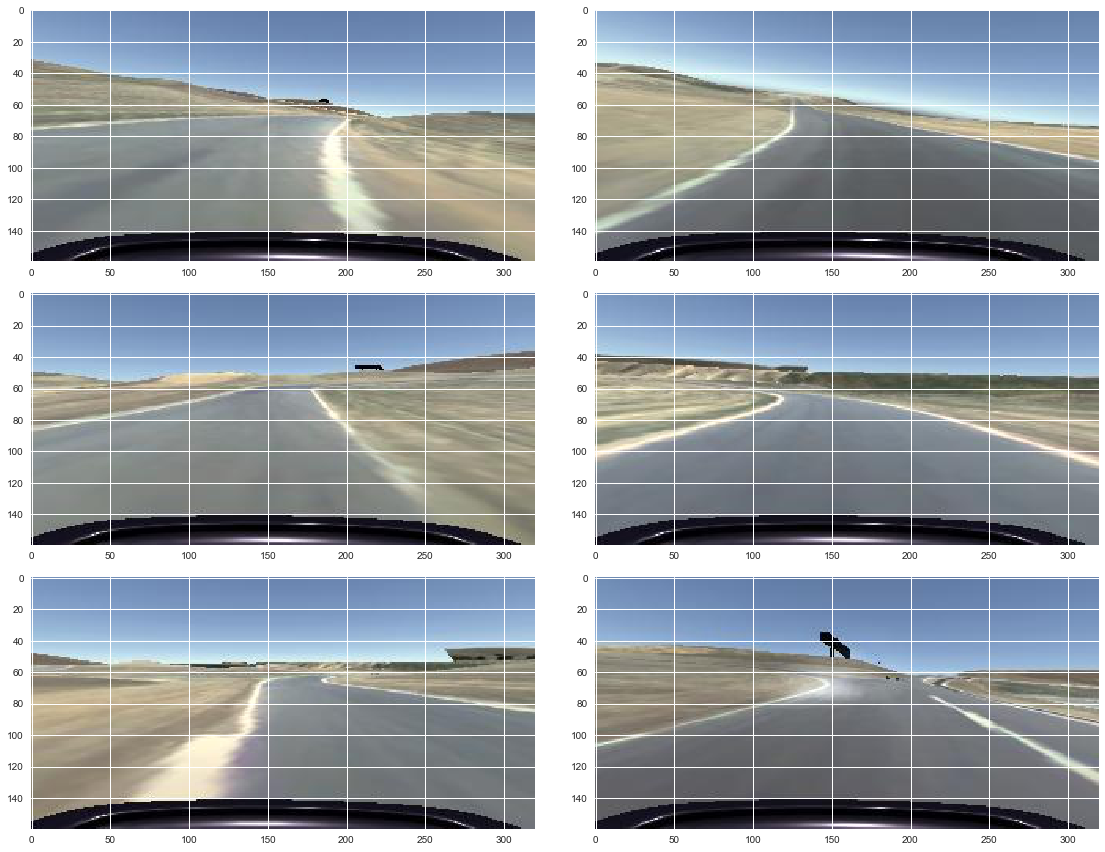

In [16]:
reload(transformations)
from transformations import Preproc

imgs = [ (ReadImg(file)) for file in sample['center'].values ]
plots(imgs, 3, 2, figsize=(16, 12), grid=True)

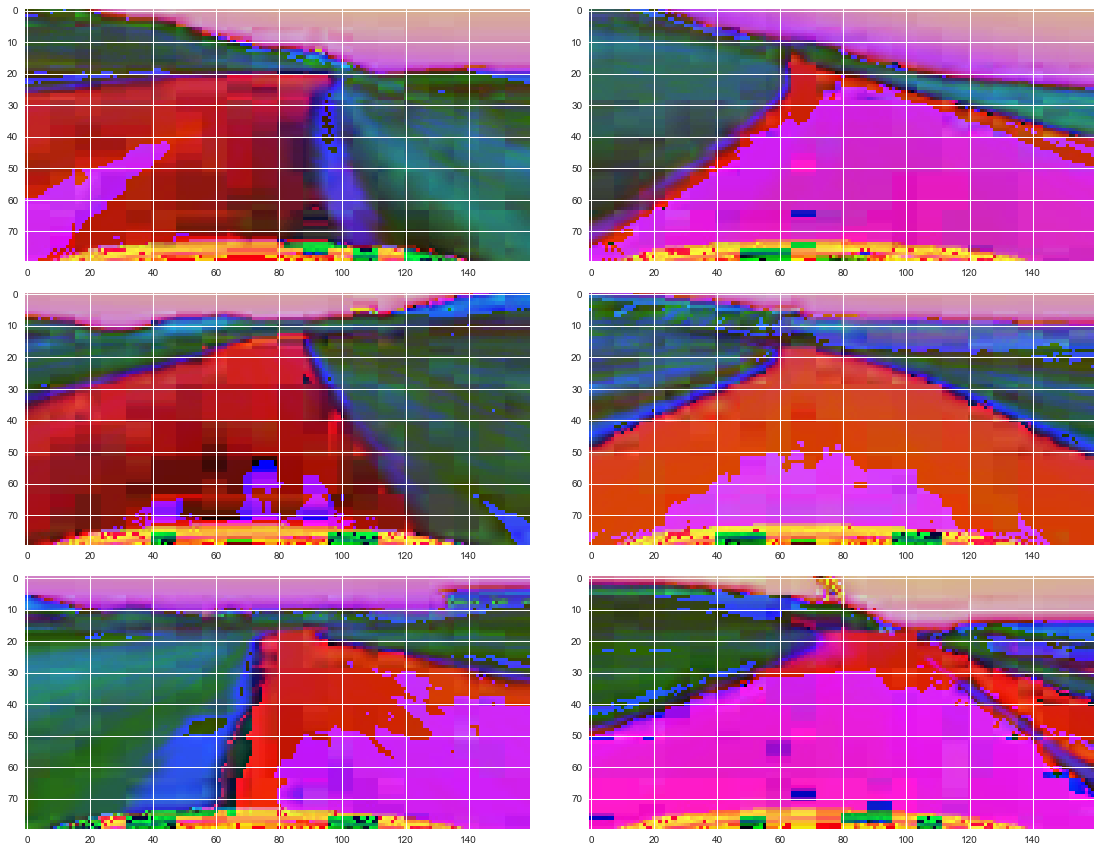

In [17]:
reload(transformations)
from transformations import Preproc

imgs = [ Preproc(ReadImg(file)) for file in sample['center'].values ]
plots(imgs, 3, 2, figsize=(16, 12), grid=True)

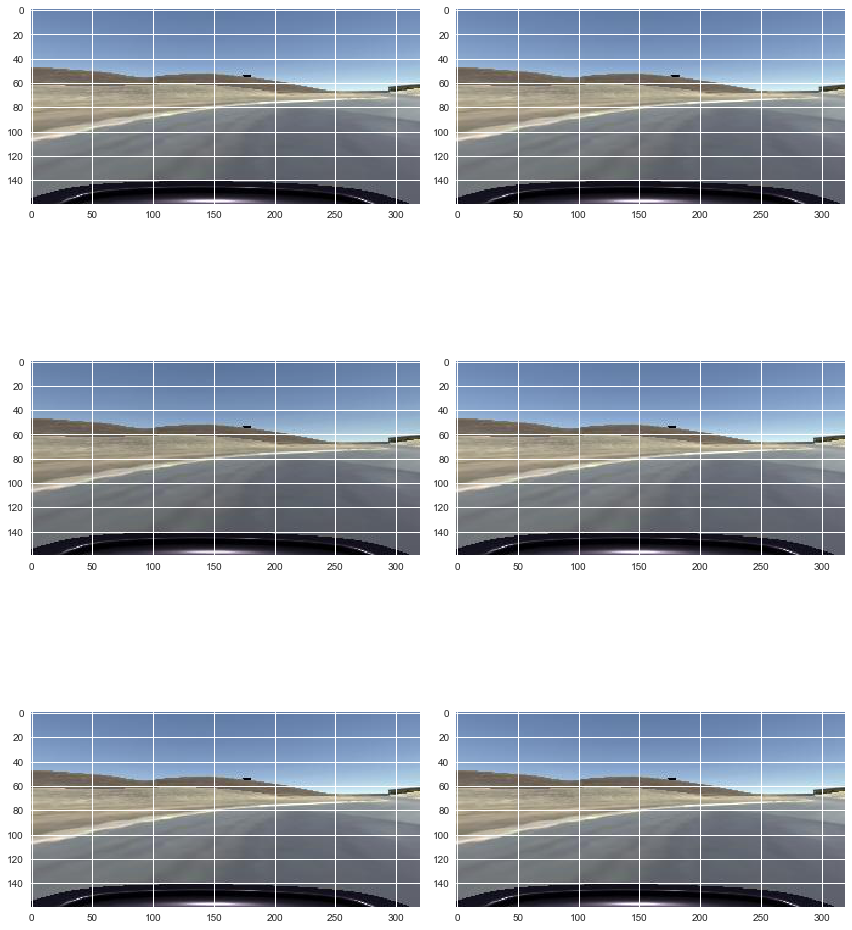

In [17]:
import config
reload(loader)
reload(config)
reload(transformations)
from loader import *
from config import *
from transformations import *

plots([
    imgs[0],
    RandomShift(imgs[0], 1)[0], 
    RandomBrightness(imgs[0], 1)[0],
    RandomRotation(imgs[0], 1)[0],
    RandomBlur(imgs[0], 1)[0],
    RandomFlip(imgs[0], 1)[0],
], 3, 2, figsize=(12, 16))

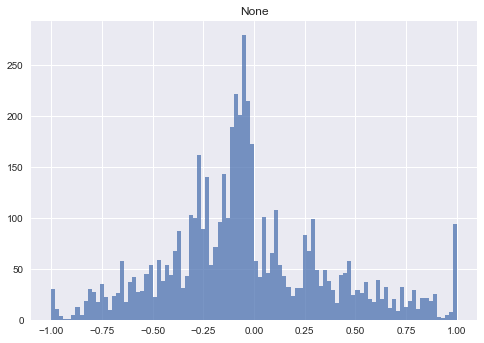

In [18]:
reload(visualization)
from visualization import hist
hist(df_train, 'steering')

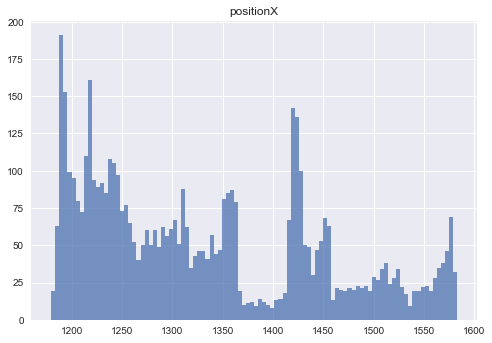

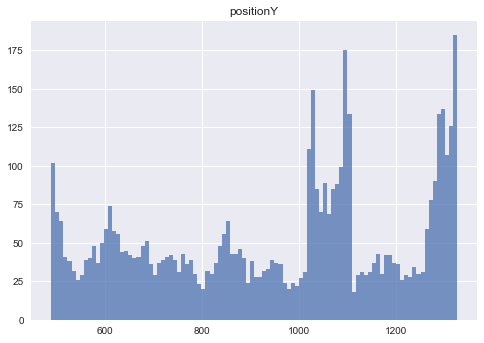

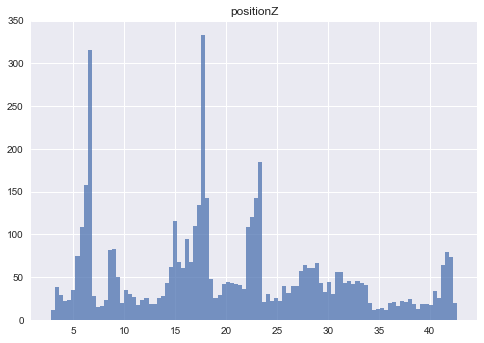

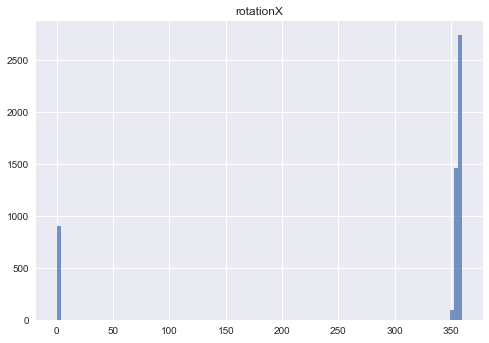

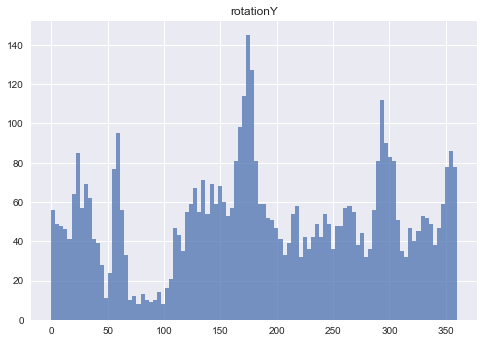

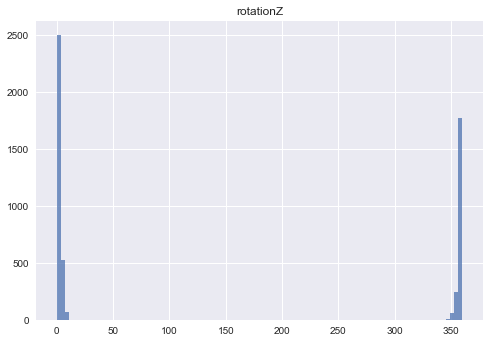

In [19]:
for col in COLUMNS_TO_NORMALIZE:
    hist(df_train, col, col)

In [403]:
class Struct:
    def __init__(self, **entries): self.__dict__.update(entries)
    def __eq__(self, other): return self.__dict__ == other.__dict__
    def __neq__(self, other): return self.__dict__ != other.__dict__
                
args = Struct(adjustement=ADJUSTMENT, width=WIDTH, height=HEIGHT, depth=DEPTH, batch=10)
for x, y in generate_thunderhill_batches(df_train, args):
    print(x.shape)
    break

(10, 66, 200, 3)


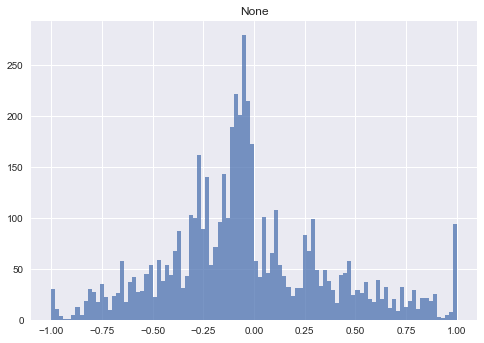

In [20]:
data = df_train
zeros = data.where(data['steering'] == 0).dropna(axis=0)
non_zeros = data.where(data['steering'] != 0.).dropna(axis=0)
# data = zeros.append(non_zeros)
hist(non_zeros, 'steering')

/opt/anaconda/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version


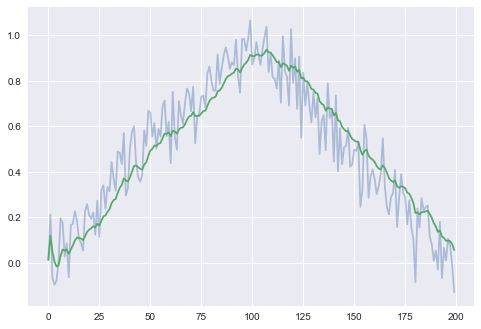

In [57]:
from pandas.stats.moments import ewma

x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )

plt.plot( x, alpha=0.4, label='Raw')
plt.plot(ewma( x, span=15 ))
plt.show()

In [9]:
import pickle
pkl_file = open('/Users/nando/Downloads/run/steering.p', 'rb')
x = np.array(pickle.load(pkl_file))
plt.plot(x, alpha=0.4, label='Raw')
plt.plot(ewma( x, span=60))

plt.show()

In [24]:
df_train[FEATURES].head()

,positionX,positionY,positionZ,rotationX,rotationY,rotationZ,throttle,brake,speed
9013,1242.360,1099.8920,17.814110,358.5156,286.6052,0.683110,0.812831,0.000000,69.00802
10075,1221.428,1096.2570,17.763070,356.5894,235.7683,357.528200,0.267233,0.000000,58.31684
7670,1198.268,1315.4960,5.670180,357.4441,245.0184,356.991800,0.000000,0.665454,44.92123
484,1267.333,734.4653,29.902970,356.4227,123.7228,1.888435,0.684954,0.000000,76.60493
3411,1206.435,1315.4950,5.618023,356.6015,254.5589,357.777100,0.000000,0.203713,43.97338


In [11]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

raw_text = 'prepare the dataset of input to output pairs encoded as integers'
seq_length = 3
dataX = []
dataY = []
for i in range(0, len(raw_text) - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char for char in seq_in])
    dataY.append(seq_out)
    n_patterns = len(dataX)
    
print(np.array(dataX).shape)
data_dim = 16
timesteps = 8
num_classes = 10
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, 2)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

print(model.summary())
print(dataX)
print(dataY)

# model.fit(x_train, y_train, batch_size=64,validation_data=(x_val, y_val))

(61, 3)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_6 (LSTM)                    (None, 8, 32)         4480        lstm_input_4[0][0]               
____________________________________________________________________________________________________
lstm_7 (LSTM)                    (None, 8, 32)         8320        lstm_6[0][0]                     
____________________________________________________________________________________________________
lstm_8 (LSTM)                    (None, 32)            8320        lstm_7[0][0]                     
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 10)            330         lstm_8[0][0]                     
Total params: 21,450
Trainable params: 21,450
Non-trainable params: 0
_____________

# LSTM

In [7]:
reload(loader)
from loader import *
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model
from keras.models import model_from_json
import numpy as np

ROOT = '/Users/nando/workspace/thunderhill_data'
OUTPUT = '/Users/nando/workspace/download/test'
df = getDataFromFolder(ROOT, OUTPUT, randomize=False, split=False)

model_file = '/Users/nando/Downloads/.hdf5_checkpoints-14/model.json'
model_weights = '/Users/nando/Downloads/.hdf5_checkpoints-14/model.h5'

with open(model_file, 'r') as f:
    model = model_from_json(f.read())

model.compile("adam", "mse")
model.load_weights(model_weights)
feature_extractor = Model(input=model.layers[0].input, output=model.layers[17].output)
feature_extractor.compile(optimizer='adam', loss='mse')

images = []
steering = []
for i, row in df.iterrows():
    org_img = ReadImg(row['center'])
    img = Preproc(org_img)
    out = feature_extractor.predict(np.reshape(img, (1, 80, 160, 3)))[0]
    images.append(out)
    steering.append(row['steering'])

In [55]:
SEQ_LENGTH = 10
dataX = []
dataY = []

for i in range(0, len(images) - SEQ_LENGTH, 1):
    dataX.append(images[i: i+SEQ_LENGTH])
    dataY.append(steering[i+SEQ_LENGTH])

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
metrics = ['mse']
lstm = Sequential()
lstm.add(LSTM(
    522,
    input_shape=(SEQ_LENGTH, 522),
    dropout_W=0.1,
    dropout_U=0.1,
    return_sequences=True))
lstm.add(Flatten())
# lstm.add(Dense(1024, activation='relu', init='he_normal'))
lstm.add(Dense(256, activation='elu', init='he_normal'))
# lstm.add(Dense(100, activation='elu', init='he_normal'))
# lstm.add(Dense(10, activation='elu', init='he_normal'))
lstm.add(Dense(1, init='he_normal'))

lstm.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=metrics)
print(lstm.summary())
lstm.fit(X_train, y_train, batch_size=128, validation_data=(X_test, y_test))

with open('model.json', 'w') as f:
    f.write(lstm.to_json())
lstm.save('model.h5')

# checkpointer = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.3f}.hdf5')
# early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')
# logger = CSVLogger('history.csv')

# history = lstm.fit_generator(
#     generate(X, args),
#     nb_epoch=args.epoch,
#     samples_per_epoch=400*args.batch,
#     validation_data=generate_thunderhill_batches(df_val, args),
#     nb_val_samples=100*args.batch,
#     callbacks=[checkpointer, early_stop, logger]
# )


5186
1297
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_14 (LSTM)                   (None, 10, 522)       2181960     lstm_input_10[0][0]              
____________________________________________________________________________________________________
flatten_7 (Flatten)              (None, 5220)          0           lstm_14[0][0]                    
____________________________________________________________________________________________________
dense_17 (Dense)                 (None, 256)           1336576     flatten_7[0][0]                  
____________________________________________________________________________________________________
dense_18 (Dense)                 (None, 1)             257         dense_17[0][0]                   
Total params: 3,518,793
Trainable params: 3,518,793
Non-trainable params: 0
_____

In [57]:
prev_image_array = deque(np.random.rand(2, 10))
prev_image_array.pop()
prev_image_array.appendleft(np.random.rand(1, 10))
print(prev_image_array[0])
print(np.random.rand(1, 10).shape)

[[ 0.75199396  0.01961086  0.4627299   0.80190281  0.3863388   0.42336334
   0.28892286  0.94858598  0.01645817  0.67078874]]
(1, 10)


In [18]:
from keras.models import model_from_json



with open('/Users/nando/Downloads/.hdf5_checkpoints-14/model.json', 'r') as f:
    feature_extractor_model = model_from_json(f.read())


with open('model.json', 'r') as f:
    model = model_from_json(f.read())
    
img = imgs[0]

feature_extractor_model.compile("adam", "mse")
feature_extractor_model.load_weights('/Users/nando/Downloads/.hdf5_checkpoints-14/model.h5')
model.load_weights('model.h5')

feature_extractor = Model(input=feature_extractor_model.layers[0].input, output=feature_extractor_model.layers[17].output)
feature_extractor.compile(optimizer='adam', loss='mse')

transformed_image_array = feature_extractor.predict(np.reshape(img, (1, 80, 160, 3)))[0]

In [41]:
from collections import deque
prev_image_array = deque(np.random.rand(10, 522), 10)
prev_image_array.appendleft(transformed_image_array)
print(len(prev_image_array))
print(float(model.predict(np.array(prev_image_array)[None, :])))

10
-0.3681398630142212


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

SVR_MODEL = 'svr.p'
SCALER = 'scaler.p'
data = df[np.concatenate((FEATURES, ['steering']), axis=0)]
y = data['throttle']
X = data.drop(['throttle'], 1)
X_scaler = StandardScaler()
X_scaler.fit(X)
scaled_X = X_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=.2, random_state=42)

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('TEST accuracy of svc = ', round(mean_squared_error(y_test, y_pred), 4))
pickle.dump(svr, open(SVR_MODEL, 'wb'))
pickle.dump(X_scaler, open(SCALER, 'wb'))

TEST accuracy of svc =  0.0396


In [100]:
X['brake'].describe()

count    6493.000000
mean        0.035066
std         0.157558
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: brake, dtype: float64

In [97]:
plt.figure()
plt.boxplot(y_pred)
plt.figure()
plt.boxplot(y_test.values, 1)
# plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x12d136be0>],
 'caps': [<matplotlib.lines.Line2D at 0x12beb9710>,
 'fliers': [<matplotlib.lines.Line2D at 0x12bec0f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12bec0160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12d136e80>,
  <matplotlib.lines.Line2D at 0x12beb3e80>]}